In [239]:
import os
import pandas as pd
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [269]:
# List of characters and classes
characterList = np.array('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.split(' '))
numbersList = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype = int)
func = np.vectorize(str)
classesText = np.concatenate([func(numbersList).reshape(-1, 1), characterList.reshape(-1, 1)])

In [270]:
# function for selecting random character
def selectorOFCharacters (listOfCharactor):
    character = np.random.choice(listOfCharactor)
    if type(character) == np.str_:
        return str(character)
    else:
        return int(character)

In [271]:
# Generating fake number Plates characters for images
def plateGenerator (numberOfPlates):
    platesList = []
    for i in range(numberOfPlates):
        plateList = []
        for j in range(8):
            if j == 2:
                plateList.append(selectorOFCharacters(characterList))
            else:
                plateList.append(selectorOFCharacters(numbersList))
        platesList.append(plateList)
    platesList = np.array(platesList)
    return platesList

In [272]:
# function for setup repetitive setup images
def setupPNGCharacter (coordinates, character, width = 90, height = 75, font = "arial.ttf", fontSize = 95,
                      destination = 'E:/Hamed/Projects/Python/License Plate Detection/License-Plate-Detection/Characterslist/{}.png'):
    font = ImageFont.truetype(font, fontSize)
    img = Image.new('RGB', (width, height), color = (255, 255, 255))
    draw = ImageDraw.Draw(img)
    if type(coordinates) != tuple:
        raise TypeError('Coordinates must be tuple')
    draw = draw.text(coordinates, character, fill = (0, 0, 0), font = font)
    img.save(destination.format(character))

In [273]:
# Create PNG files of characters
def createPNGPieces (charactersList):
    if isinstance(charactersList[0], str):
        for character in charactersList:
            if character == 'C':
                setupPNGCharacter(coordinates = (10, -16), character = character)
            elif character == 'G':
                setupPNGCharacter(coordinates = (8, -15), character = character)
            elif character == 'I':
                setupPNGCharacter(coordinates = (32, -15), character = character)
            elif character == 'J':
                setupPNGCharacter(coordinates = (23, -15), character = character)
            elif character == 'L':
                setupPNGCharacter(coordinates = (18, -15), character = character)
            elif character == 'M':
                setupPNGCharacter(coordinates = (6, -15), character = character)
            elif character == 'O':
                setupPNGCharacter(coordinates = (8, -15), character = character)
            elif character == 'Q':
                setupPNGCharacter(coordinates = (7, -16), character = character)
            elif character == 'W':
                setupPNGCharacter(coordinates = (0, -16), character = character)
            else:
                setupPNGCharacter(coordinates = (14, -14), character = character)
    else:
        for character in charactersList:
            character = str(character)
            setupPNGCharacter(coordinates = (-1, -15), character = character, width = 50, height = 75)
            setupPNGCharacter(coordinates = (-1, -15), character = character, width = 45, height = 65, fontSize = 85,
            destination = 'E:/Hamed/Projects/Python/License Plate Detection/License-Plate-Detection/Characterslist/smaller{}.png')

In [274]:
createPNGPieces(characterList)
createPNGPieces(numbersList)

In [275]:
# Preparing characters of number Plates for png files
def joiningPartsOfPlate (plate):
    return list(map(lambda number:''.join(number), plate))

In [276]:
# for prepare background and foreground image
def imageManager (character, width, height, backgroundImage = 'Plate Pieces/background.png',
                  foregroundImage = 'Characterslist/{}.png'):
    background = Image.open(backgroundImage)
    foreground = Image.open(foregroundImage.format(character))
    background.paste(foreground, (width, height))
    background.save(backgroundImage)

In [248]:
# creating real number Plates
def createNumberPlates (plates):
    for plateNumber in range(len(plates)):
        image = Image.open('Plate Pieces/composite.png')
        background = image.copy()
        background.save('Plate Pieces/background.png')
        width = 85
        for i in range(8):
            if i < 2:
                imageManager (plates[plateNumber, i], width, 26)
                width += 55
            elif i == 2:
                imageManager (plates[plateNumber, i], width, 26)
                width += 95
            elif i > 2 and i < 6:
                imageManager (plates[plateNumber, i], width, 26)
                width += 55
            elif i == 6:
                imageManager (plates[plateNumber, i], 470, 42)
            else:
                imageManager (plates[plateNumber, i], 537, 42)
        background = Image.open('Plate Pieces/background.png')
        name = joiningPartsOfPlate([plates[plateNumber]])[0]
        background.save('Plate Pieces/{}.png'.format(name))
    os.remove(path = 'Plate Pieces/background.png')

In [249]:
createNumberPlates(plateGenerator(10))

In [250]:
# for finding character and it's coordinates
def searchAndAppendCharacter(character, listOfChracters, xmin, xmax, ymin = 26, ymax = 101):
    classOfChracter = np.where(classesText == character)[0][0]
    xmin = xmin
    ymin = ymin
    xmax = xmax
    ymax = ymax
    listOfChracters = listOfChracters.append([classOfChracter, xmin, ymin, xmax, ymax])

In [283]:
# This function gonna make data classes and coordinates
def summary (plates):
    listOfAllSummeries = []
    for plate in plates:
        # make a list for one plate
        listOfThisPlateSummery = []
        xMin = 85
        for character in range(8):
            # first find the classes and texes
            # second add coordinates
            # third add them together
            if character < 2:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, xMin, xMin + 50)
                xMin += 55
            elif character == 2:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, 195, xMin + 95)
                xMin += 55
            elif character < 6:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, xMin, xMin + 50)
                xMin += 55
            elif character == 7:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, 470, 515, 42, 107)
            else:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, 537, 582, 42, 107)
        listOfThisPlateSummery = np.array(listOfThisPlateSummery)
        listOfAllSummeries.append(listOfThisPlateSummery)
    return np.array(listOfAllSummeries)

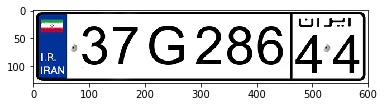

In [253]:
image = Image.open('Plate Pieces/37G28644.png')
plt.imshow(image)